# Analysis of Quasi-One-Dimensional Nozzle Flow with Analytical and Numerical Methods

This notebook covers an indepth analysis of an isentropic flow through a convergin diverging nozzle for both the subsonic and the supersonic regime based on the problem addressed in chapter 7 of John D. Anderson's book *Computational Fluid Dynamics: The Basics with Applications*. The inlet of the nozzle is fed from a resivour and will have a constant pressure and temperature $(p_0, T_0)$. The flow will be subsonic in the converging portion of the nozzle, sonic at the throat (M=1) and supersonic at the exit of the nozzle. 
## Analytical Solution
This problem is solved analytically which gives us a great reference point to try out numerical methods. Let's first look at the analytical solution and then move on to numerical mehtods to solve the problem using CFD. The analytical solutions for continuity, energy and momentum are as follows. 

Continuity: $\rho_1 V_1 A_1 = \rho_2 V_2 A_2 $

Momentum: $p_1 A_1 + \rho_1 V_1^2 A_1 + \int_{A_1}^{A_2}pdA = p_2 A_2 + \rho_2 V_2^2 A_2$ 

Energy: $h_1 + \frac{v_1^2}{2} = h_2 + \frac{V_2^2}{2}$

The different subscripts denote the location of the flow inside of the nozzle. In addition to the flow equations, we also have the ideal gas equation:

$p = \rho R T$

This flow consists of a calorically perfect gas:

$h = c_p T$


The Mach number in the nozzle is determined by the area ratio $A/A^*$ where $A^*$ is the area of the nozzle at the choak point (M=1).


$\Big (\frac{A}{A^*} \Big)^2 = \frac{1}{M^2}\Big[\frac{2}{\gamma +1}\Big(1+\frac{\gamma-1}{2}M^2\Big)\Big]^{(\gamma+1)/(\gamma-1)}$

Gamma ($\gamma$) is defined as the ratio of specific heats and for air, the standard value is 1.4. 

The rest of the parameters can be solved in terms of the mach number:

$\frac{p}{p_0}  = \Big(1+\frac{\gamma-1}{2}M^2\Big)^{(-\gamma)/(\gamma-1)}$


$\frac{\rho}{\rho_0}  = \Big(1+\frac{\gamma-1}{2}M^2\Big)^{-1/(\gamma-1)}$


$\frac{T}{T_0}  = \Big(1+\frac{\gamma-1}{2}M^2\Big)^{-1}$




To view these relationships, we can plot the analytical solution.

In [3]:
import numpy as np                 #loading in numpy
from matplotlib import pyplot      #load matplotlib
import math                        # load math in 
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline 

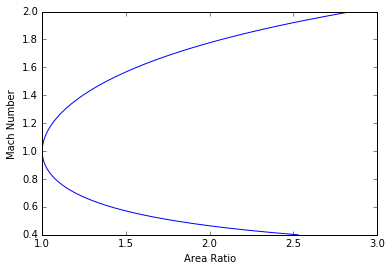

In [4]:
# Mach number vs Area Ratio
M = np.linspace(0.4,2,100)
aRatio = (1/M**2)* ((2/(2.4))*(1+(.4/2)*M**2))**((2.4)/(0.4))
pyplot.plot(aRatio,M)
pyplot.xlabel('Area Ratio')
pyplot.ylabel('Mach Number')

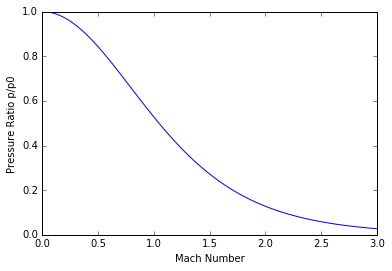

In [5]:
M = np.linspace(0,3,100)
# Pressure Ratio
pRatio = (1+ (0.4/2)*M**2)**(-1.4/0.4)
pyplot.plot(M,pRatio)
pyplot.xlabel('Mach Number')
pyplot.ylabel('Pressure Ratio p/p0')

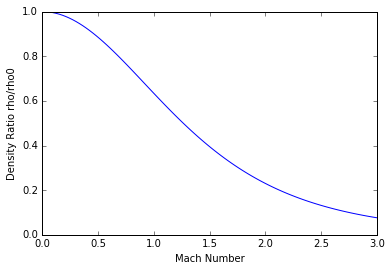

In [6]:
# Density Ratio
rhoRatio = (1+ (0.4/2)*M**2)**(-1/0.4)
pyplot.plot(M,rhoRatio)
pyplot.xlabel('Mach Number')
pyplot.ylabel('Density Ratio rho/rho0')

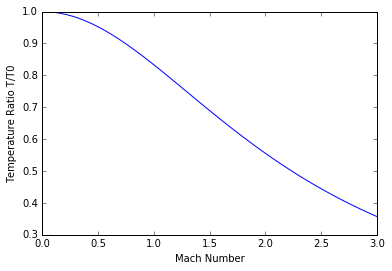

In [7]:
# Temperature Ratio
TRatio = (1+ (0.4/2)*M**2)**(-1)
pyplot.plot(M,TRatio)
pyplot.xlabel('Mach Number')
pyplot.ylabel('Temperature Ratio T/T0')

## Numerical Solution 
The first step of any numerical solution is to first write down the governing equations for the problem. In this case, we will be looking for a continuity, momentum and energy equation that will describe the flow.
### Continuity Equation
For the continuity equation, we will use the intrgral finite volume method.

$\frac{\partial}{\partial t} \iiint \limits_V \rho dV + \frac{\partial}{\partial t} \iint \limits_S \rho \textbf{V} \cdot \textbf{dS} = 0$

This equation means that the total rate of change of mass inside of the volume is equal to the amount of stuff crossing the surface of the volume. To relate the volume integral to out physical problem, we can write the following equation:


$\frac{\partial}{\partial t} \iiint \limits_V \rho dV = \frac{\partial}{\partial t} (\rho A dx)$


In this equation the value of dx*A represents an elemental volume inside of our nozzle. It is like a cross sectional area multiplied by some small length of dx. Now for the surface integral, an equation can be written as follows. 

$\frac{\partial}{\partial t} \iint \limits_S \rho \textbf{V} \cdot \textbf{dS} = -\rho V A + (\rho + d \rho)(V+ dV)(A+dA)$


Expaning this equation and combining it with the previous one, we have a form of the contiuity equation in terms of differential elements relating to our system.


$\frac{\partial (\rho A)}{\partial t} + \frac{\partial (\rho A V)}{\partial x} = 0$

### Momentum Equation
The next step in describing our system is to utilize the momentum equation. Neglecting viscous  stress terms and body forces we cna represent the momentum equation as shown below.

$\frac{\partial}{\partial t} \iiint \limits_V (\rho u) dV + \frac{\partial}{\partial t} \iint \limits_S (\rho u \textbf{V}) \cdot \textbf{dS} = \iint \limits_S (p dS)_x$

The first two terms can be transformed in a similar way as shown in the previous section but with an additional velovity component. 

$\frac{\partial}{\partial t} \iiint \limits_V (\rho u) dV = \frac{\partial}{\partial t} (\rho V A dx)$


$\frac{\partial}{\partial t} \iint \limits_S (\rho u \textbf{V}) \cdot \textbf{dS} = -\rho V^2 A + (\rho + d \rho)(V+ dV)^2(A+dA)$

The term on the right side of the equal sign represents the pressure around our element of fluid. This term can be represented with the following expression.

$\iint \limits_S (p dS)_x = -pA + (p+dp)(A+dA) - 2p\Big(\frac{dA}{2}\Big)$

Combining all of these terms we get the following equation.

$\frac{\partial (\rho V A)}{\partial t} + \frac{\partial (\rho V^2 A)}{\partial x} = -A \frac{\partial p}{\partial x}$

This is the conservation form of this equation, but we want a nonconservation form for our numerical analysis. WE can do this by multiplying the continuity equation by V resulting in the following equation. 

$V\frac{\partial (\rho A)}{\partial t} + V\frac{\partial (\rho A V)}{\partial x} = 0$

Now we can subtract this equation from the momentum equation we derived just before. With some manipulation, we are left with the final momentum equation. 

$\rho \frac{\partial V}{\partial t} + \rho u \frac{\partial u}{\partial x} = -\frac{\partial p}{\partial x}$

### Energy Equation
The integral form of the energy equation with no energy source terms is as follows.

$\frac{\partial}{\partial t} \iiint \limits_V \rho \Big(e+\frac{V^2}{2}\Big) dV + \iint \limits_S \rho\Big(e+\frac{V^2}{2}\Big)\textbf{V} \cdot \textbf{dS} = \iint \limits_S (p \textbf{V}) \cdot \textbf{dS}$

With some manipulation, we are able to transform the equation into an equation that represents our system and is in nonconservation form.  

$\rho \frac{\partial e}{\partial t} + \rho V \frac{\partial e}{\partial x} = -p\frac{\partial V}{\partial x} - pV\frac{\partial(ln A)}{\partial x}$

There is one thing left to consider, and that is the heat coefficient for the fluid. In this case, we are dealing with a calorically perfect gas. 

$e = c_v T$

Finally we have an energy equation that we can use for our numerical methods.


$\rho  c_v\frac{\partial T}{\partial t} + \rho V c_v \frac{\partial T}{\partial x} = -p\frac{\partial V}{\partial x} - pV\frac{\partial(ln A)}{\partial x}$

### Summary of Equations

As we take a moment to exampine our equations, we can see that the variables are $\rho$, V, p and T but with the use of the ideal gas equation, we can reduce the number of unknownsby one. 

$p = \rho R T$

$\frac{\partial p}{\partial x} = R \Big( \rho \frac{\partial T}{\partial x} + T \frac{\partial \rho}{\partial x}\Big )$

Now we can inplement this equation and reduce the continuity, momentum, and energy equations to only have three unknown variables. The continuity equation is simply exanded and the other two are rearranged with the new definition. 


Continuity: $\frac{\partial (\rho A)}{\partial t} + \rho A\frac{\partial V}{\partial x}+ \rho V \frac{\partial A}{\partial x}+ VA\frac{\partial \rho}{\partial x} = 0$

Momentum: $\rho \frac{\partial V}{\partial t} + \rho V \frac{\partial V}{\partial x} = -R\Big(\rho \frac{\partial T}{\partial x}+ T \frac{\partial \rho}{\partial x}\Big)$

Energy: $\rho  c_v\frac{\partial T}{\partial t} + \rho V c_v \frac{\partial T}{\partial x} = -\rho R T\Big[\frac{\partial V}{\partial x} + V\frac{\partial(ln A)}{\partial x}\Big]$


At this point, we have our flow equations and we only have a few more things to take care of befor we can start writing some programs to solve the problem. 
#### Nondimensional Numbers

In order to simplify our problem, we will use nondimensional number for our calculations. We can write our nondimensional temperature and density as follows.

$T' = \frac{T}{T_0}$  

and 

$\rho' = \frac{\rho}{\rho_0}$

Additionally, we can define out nondimensional length with the following equation.

$x' = \frac{x}{L}$

Where L is the length of the nozzle. The speed of sound is defined as 

$a_0 = \sqrt{\gamma R T_0}$

and a nondimensional velocity of 

$V' = \frac{V}{a_0}$

Time can also be put in a nondimensional form as shown in the following equation.

$t' = \frac{t}{L/a_0}$

Lastly, the area can be nondimensionalized by dividing by the throat area where the flow is at $M=1$. 

$A' = \frac{A}{A^*}$

With all of the relationships we need, we can nondimensionalize our continuity, momentum and state equations.


Continuity: $\frac{\partial \rho'}{\partial t'} = -\rho ' \frac{\partial V'}{\partial x'} -\rho 'V'\frac{\partial (ln A')}{\partial x'} - V'\frac{\partial \rho'}{\partial x'}$

Momentum: $\frac{\partial V'}{\partial t'} = -V' \frac{\partial V'}{\partial x'} - \frac{1}{\gamma}\Big(\frac{\partial T'}{\partial x'} + \frac{T'}{\rho'}\frac{\partial \rho '} {\partial x'}\Big)$

Energy: $\frac{\partial T'}{\partial t'} =-V' \frac{\partial T'}{\partial x'} - (\gamma -1)T'\Big[\frac{\partial V'}{\partial x'} +V'\frac{\partial (ln A')}{\partial x'}\Big]$


Yayy! We finally made it to the end of the math part (well kinda...). The next step is to take the equations that describe our flow and put it in a form that the computer can understand. In this case, we will be using a finite difference method with MacCormack's explicit technique which uses a predictor-corrector method to help us get sencond order accuracy without doing an insane amount of algebra and book keeping. Because this is a quasi-one-dimensional problem, we only need to make a grid that is one dimensional.

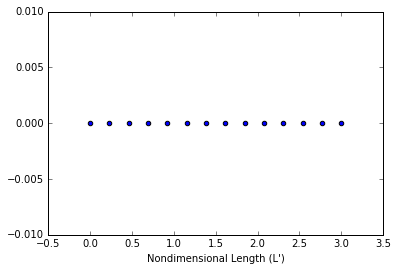

In [8]:
# Generate our grid of points 
numPts = 14 # number of grid points
length = 3  # nondimensional length of out nozzle
grid = np.zeros(numPts)
pyplot.scatter(np.linspace(0,length,numPts),grid) #plotting the nodes 
pyplot.xlabel('Nondimensional Length (L\')')

The plot above shows the uniform distribution of our points. Now we are ready to start developing the equations that we will use for the finite difference method. The first step is to execute the predictor step. To do this, we calculate the first order derivative at our point of interest at time $t$.

$\Big(\frac{\partial \rho}{\partial t}\Big)_i^t= -\rho_i^t \frac{V^t_{i+1} - V^t_i}{\Delta x} -\rho_i^t V^t_i\frac{ln A^t_{i+1} - ln A^t_i}{\Delta x} -V_i^t \frac{\rho^t_{i+1} - \rho^t_i}{\Delta x}$

The same is done for the velocity and temperature. 

$\Big(\frac{\partial V}{\partial t}\Big)_i^t= -V_i^t \frac{V^t_{i+1} - V^t_i}{\Delta x} -\frac{1}{\gamma}\Big(\frac{T^t_{i+1} - T^t_i}{\Delta x} +\frac{T^t_i}{\rho^t_i} \frac{\rho^t_{i+1} - \rho^t_i}{\Delta x}\Big)$


$\Big(\frac{\partial T}{\partial t}\Big)_i^t= -V_i^t\frac{T^t_{i+1} - T^t_i}{\Delta x} - (\gamma -1)T^t_i\Big(\frac{V^t_{i+1} - V^t_i}{\Delta x} + V^t_i \frac{ln A^t_{i+1} - ln A^t_i}{\Delta x}\Big)$

These values are then used to calculate the predicted step with the following equations


$\bar{\rho}_i^{t+\Delta t} =\rho_i^t +\Big(\frac{\partial \rho}{\partial t}\Big)_i^t \Delta t$

$\bar{V}_i^{t+\Delta t} =V_i^t +\Big(\frac{\partial V}{\partial t}\Big)_i^t \Delta t$

$\bar{T}_i^{t+\Delta t} =T_i^t +\Big(\frac{\partial T}{\partial t}\Big)_i^t \Delta t$


The second part of this technique is the corrector step. The corrector step gets the slope of the predicted value which will be used in the final step to determine $(\partial /\partial t)_{av}$

$\Big(\frac{\bar{\partial \rho}}{\partial t}\Big)_i^{t+\Delta t t}= -\bar{\rho}_i^{t+\Delta t} \frac{\bar{V}^{t+\Delta t}_{i} - \bar{V}^{t+\Delta t}_{i-1}}{\Delta x} -\bar{\rho}_i^{t+\Delta t} \bar{V}^{t+\Delta t}_i\frac{ln \bar{A}^{t+\Delta t}_{i} - ln \bar{A}^{t+\Delta t}_{i-1}}{\Delta x} -\bar{V}_i^{t+\Delta t} \frac{\bar{\rho}^{t+\Delta t}_{i} - \bar{\rho}^{t+\Delta t}_{i-1}}{\Delta x}$

The same is done for the velocity and temperature. 

$\Big(\frac{\bar{\partial V}}{\partial t}\Big)_i^{t+\Delta t}= -\bar{V}_i^{t+\Delta t} \frac{\bar{V}^{t+\Delta t}_{i} - \bar{V}^{t+\Delta t}_{i-1}}{\Delta x} -\frac{1}{\gamma}\Big(\frac{\bar{T}^{t+\Delta t}_{i} - \bar{T}^{t+\Delta t}_{i-1}}{\Delta x} +\frac{\bar{T}^{t+\Delta t}_i}{\bar{\rho}^{t+\Delta t}_i} \frac{\bar{\rho}^{t+\Delta t}_{i} - \bar{\rho}^{t+\Delta t}_{i-1}}{\Delta x}\Big)$


$\Big(\frac{\bar{\partial T}}{\partial t}\Big)_i^{t+\Delta t}= -\bar{V}_i^{t+\Delta t}\frac{\bar{T}^{t+\Delta t}_{i} - \bar{T}^{t+\Delta t}_{i-1}}{\Delta x} - (\gamma -1)\bar{T}^{t+\Delta t}_i\Big(\frac{\bar{V}^{t+\Delta t}_{i} - \bar{V}^{t+\Delta t}_{i-1}}{\Delta x} + \bar{V}^{t+\Delta t}_i \frac{ln \bar{A}^{t+\Delta t}_{i} - ln \bar{A}^{t+\Delta t}_{i-1}}{\Delta x}\Big)$


The partial derivative average can be calculated using the following equation


$\Big(\frac{\partial}{\partial t}\Big)_{av} = \frac{1}{2}\Big[\Big(\frac{\partial}{\partial t}\Big)_i^t+\Big(\frac{\bar{\partial}}{\partial t}\Big)_i^{t+\Delta t}\Big]$


Finally, the value we want can be calculated (with second order accuracy) using this equation


$\rho_i^{t+\Delta t} = \rho_i^t + \Big(\frac{\partial \rho}{\partial t}\Big)_{av}\Delta t$

$V_i^{t+\Delta t} = V_i^t + \Big(\frac{\partial V}{\partial t}\Big)_{av}\Delta t$

$T_i^{t+\Delta t} = T_i^t + \Big(\frac{\partial T}{\partial t}\Big)_{av}\Delta t$
 
Now that we know how to solve the equations of our flow, lets write a function that can take information from some given nodes and return the values after one time iteration. Doing this now will save us time and space when we write the main code to solve our plroblem.

In [110]:
def calcStep(rho,vel,temp,area,gamma,deltat,deltax):
    """
    Import three numpy arrays that represent the density volocity and temperature of each element
    rho : density array 
    vel : velocity array
    temp: temperature array
    deltat : time step for the elements
    deltax : space between each element
    """ 
    #loop through each element starting at index 1 and ending at index numPts-1 (N-1)
    numElm = len(rho)
    
    #Density
    fwddRhodt  = np.zeros(numElm)
    bkwddRhodt  = np.zeros(numElm)
    rhoBar = np.zeros(numElm)
    dRhoAv = np.zeros(numElm)
    #Velocity
    
    fwddvdx  = np.zeros(numElm)
    bkwddvdx  = np.zeros(numElm)
    VBar = np.zeros(numElm)
    dVAv = np.zeros(numElm)
    #Temperature 
    
    fwddTdx = np.zeros(numElm)
    bkwddTdx = np.zeros(numElm)
    TBar = np.zeros(numElm)
    dTAv = np.zeros(numElm)
    
    ##################
    ####Predictor Step
    ##################
    for i in range(1,numElm-1):
            #Predictor Step
            # Calculate first derivative of density
            fwddRhodt[i] = -rho[i] * ( (vel[i+1]-vel[i])/deltax) -(rho[i]*vel[i]*(math.log(area[i+1])-math.log(area[i]))/deltax) - (vel[i]*(rho[i+1]-rho[i])/deltax)
            rhoBar[i]  = rho[i]+  fwddRhodt[i] * deltat
            
            # Calculate first derivative of velocity
            fwddvdx[i] = -vel[i]*((vel[i+1]-vel[i])/deltax)-(1/gamma)*(((temp[i+1]-temp[i])/deltax)+(temp[i]/rho[i])*(rho[i+1]-rho[i])/deltax)
            VBar[i]  = vel[i] + fwddvdx[i] * deltat
                 
            # Calculate first derivative of temperatures
            a = -vel[i]*(temp[i+1]-temp[i])/deltax
            b = (gamma-1)*temp[i]
            c = (vel[i+1]-vel[i])/deltax
            d = vel[i]*((math.log(area[i+1])-math.log(area[i]))/deltax)
            fwddTdx[i] = a-b*(c+d)
            TBar[i] = temp[i] + (fwddTdx[i]) * deltat
            
    # Calculate BC's for the preictor step                                
    rhoBar[0] = 1
    VBar[0] = 2*VBar[1]-VBar[2]
    TBar[0] = 1
                                    
    
    # We have the values for the predicted values and the slopes
    ###################
    ####Corrector Step
    ###################
    for i in range(1,numElm-1):
        bkwddRhodt[i] = -rhoBar[i] * ( (VBar[i]-VBar[i-1])/deltax) - (rhoBar[i]*VBar[i]*(math.log(area[i])-math.log(area[i-1]))/deltax) -(VBar[i]*(rhoBar[i]-rhoBar[i-1])/deltax)
        
        bkwddvdx[i] = -VBar[i]*((VBar[i]-VBar[i-1])/deltax)-(1/gamma)*(((TBar[i]-TBar[i-1])/deltax)+(TBar[i]/rhoBar[i])*(rhoBar[i]-rhoBar[i-1])/deltax)
            
        a = -VBar[i]*(TBar[i]-TBar[i-1])/deltax
        b = (gamma-1)*TBar[i]
        c = (VBar[i]-VBar[i-1])/deltax
        d = VBar[i]*((math.log(area[i])-math.log(area[i-1]))/deltax)
        bkwddTdx[i] = a-b*(c+d)
        
        dRhoAv[i] = 0.5*(fwddRhodt[i]+bkwddRhodt[i])
        dVAv[i]   = 0.5*(fwddvdx[i]+bkwddvdx[i])
        dTAv[i]   = 0.5*(fwddTdx[i]+bkwddTdx[i])
        
        rho[i] = rho[i]   + dRhoAv[i] * deltat
        vel[i] = vel[i]   + dVAv[i]   * deltat
        temp[i] = temp[i] + dTAv[i]   * deltat
        
    #Set BC's for the final values 
    #Far left BC
    rho[0] = 1
    vel[0] = 2*vel[1]-vel[2]
    temp[0] = 1
    #Far right BC                                
    rho[numElm-1]= (2*rho[numElm-2])-rho[numElm-3]
    vel[numElm-1] = (2*vel[numElm-2])-vel[numElm-3]
    temp[numElm-1] = (2*temp[numElm-2])-temp[numElm-3]
    return rho,vel,temp,dRhoAv,dVAv #output new values and d/dt for residuals

The code above impliments the finite difference method we developed earlier. There were several lines of code in that function dealing with some material that we have yet to cover, boundary conditions. We need to establish the boundary conditions to anchor our mathematics to our physical problem. The left side of our grid represents the subsonic inflow of from a reservoir this is our very first node. From there we have our regular nodes governed by our flow equations and at the other end we have a supersonic our flow (we will address a subsonic exit flow later). The Nth node will be our outflow condition. The first step in setting our boundary conditions is to use the method of characteristics for an unsteady, one-dimensional flow. This type of flow is characterized by a hyperbolic PDE which means that the solution has two real characteristic lines. For our subsonic inlet, the left-running line propigates behind the inlet and the right-running characteristic line runs downstream toward the exit of the nozzle. One way to think about these lines is to consider hwo information travels in a flow. For the subsonic flow, information can travel upstream, because the velocity of the flow is less than the speed of sounds (how fast waves propigate in a flow). The super sonic outlet is moving at speeds grearter than the speed of sound, so information can not propigate upstream. Because of this, we must allow one of the varibles at the first node to float while the other two flow variables are set. As for the outflow boundary condition, all values are allowed to float due to the fact that the laft and right-running characteristic lines are carried downstream. 


For inlet node: 

$V_1 = 2V_2 - V_3$

$\rho_1 =1$ (Constant)

$T_1 = 1$ (Constant)

For outlet node:

$V_N = 2V_{N-1}-V_{N-2}$

$\rho_N = 2\rho_{N-1}-\rho_{N-2}$

$T_N = 2T_{N-1}-T_{N-2}$

## Time Step
For our time step, we must consider the Courant number

$\Delta t = C\frac{\Delta x}{a+V}$

Where a is the speed of sound locally and V is the local velocity. For every element, there will be a different value for a given Courant number and although we can use a local timestep, we will instead just use the minimum of the whole system at a given timestep.


## Nozzle Shape
For our nozzle shpae, we will use the following equation for area

$A = 1+2.2(x-1.5)^2$

(-1.5, 1.5)

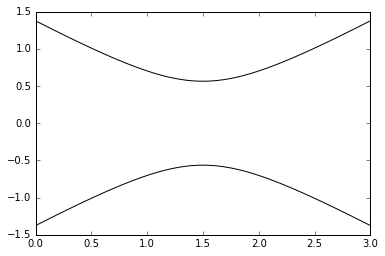

In [10]:
x=np.linspace(0,3,100)
A=1+2.2*(x-1.5)**2
y=(A/3.1415)**0.5
pyplot.plot(x,y,'black')
pyplot.plot(x,-y,'black')
pyplot.xlim([0,3])
pyplot.ylim([-1.5,1.5])

## Initial Conditions

The initial conditions for this simulation will be

$\rho = 1-0.3146x$

$T=1-0.2314x$

$V=(0.1+1.09x)T^{1/2}$

## Running the Simulation (Main Code)

We have finally arrived at the spot where we can put it all together. The following code will be a culmination of all of the information we have gathered before. Let's rock and roll!

In [111]:
## Main Script for quasi-1D-nozzle flow
def main():
    #Initialize our gird
    numPts =31 # number of grid points
    length = 3  # nondimensional length of out nozzle
    gridLoc = np.linspace(0,length,numPts)
    area = 1+2.2*(gridLoc-1.5)**2 #initialize area

    #Initial conditions of flow
    gamma = 1.4
    rho = 1-0.3146*gridLoc
    temp = 1-0.2314*gridLoc
    vel = (0.1+1.09*gridLoc)*temp**0.5
    a = temp**0.5 #speed of sound

    #Iterations and plotting set up
    totalIter = 1400
    rhoRes = np.ones(numPts)
    velRes = np.ones(numPts)
    k = int(numPts/2)
    
    #Calculate first time step 
    cNum = 0.4 # Courant number
    deltax = length/(numPts-1)
    dtLocal = cNum *(deltax/(a+vel))
    deltat = min(dtLocal)

    #Initialize Matrix to store our output data
    # set up to be n point number of rows X total iterations
    rhoResults = np.zeros(shape=(numPts,totalIter+1))
    tempResults = np.zeros(shape=(numPts,totalIter+1))
    velResults = np.zeros(shape=(numPts,totalIter+1))
    rhoResidualResults = np.zeros(shape=(numPts,totalIter+1))
    velResidualResults = np.zeros(shape=(numPts,totalIter+1))
    
    rhoResults[:,0] = rho
    tempResults[:,0] = temp
    velResults[:,0] = vel
    rhoResidualResults[:,0] = rhoRes
    velResidualResults[:,0] = velRes
    
    iter=1
    #Iterate
    while iter <= totalIter:
        rho,vel,temp,rhoRes,velRes = calcStep(rho,vel,temp,area,gamma,deltat,deltax)
        # Save info in matrix
        rhoResults[:,iter] = rho
        tempResults[:,iter] = temp
        velResults[:,iter] = vel
        rhoResidualResults[:,iter] = rhoRes
        velResidualResults[:,iter] = velRes 
        
        #Recalculate timestep
        a = temp**0.5 #speed of sound
        dtLocal = cNum *(deltax/(a+vel))
        deltat = min(dtLocal)
        # Add 1 to itteration
        iter=iter+1    
        
    return rhoResults,tempResults,velResults,rhoResidualResults,velResidualResults,area
rhoResults,tempResults,velResults,rhoResidualResults,velResidualResults,area = main()
print('Done.')

Done.


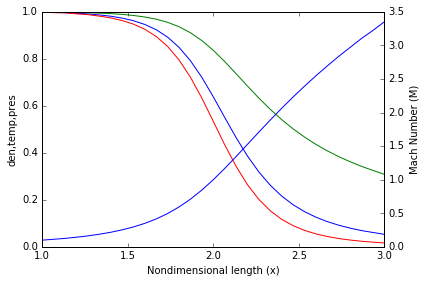

In [112]:
#Lets plots out results 
x = np.linspace(1,3,len(rhoResults[:,-1]))
fig, ax1 = pyplot.subplots()
ax1.plot(x,rhoResults[:,-1],label='Nondimensional density')
ax1.plot(x,tempResults[:,-1],label='Nondimensional Temperature')
ax1.plot(x,tempResults[:,-1]*rhoResults[:,-1],label='Nondimensional Pressure')

ax1.set_xlabel('Nondimensional length (x)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('den,temp,pres')
ax1.tick_params('y')

ax2 = ax1.twinx()
ax2.plot(x,velResults[:,-1]/tempResults[:,-1]**0.5,label='Mach number')
ax2.set_ylabel('Mach Number (M)')
ax2.tick_params('y')


fig.tight_layout()
pyplot.show()


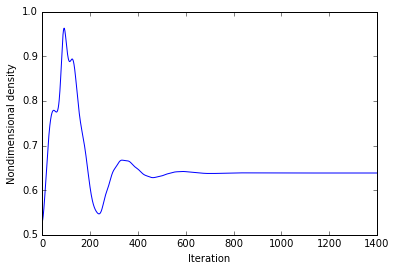

In [113]:
# Density vs iteration at throat of nozzle
pyplot.plot(rhoResults[int(len(rhoResidualResults)/2),:])
pyplot.xlabel('Iteration')
pyplot.ylabel('Nondimensional density')

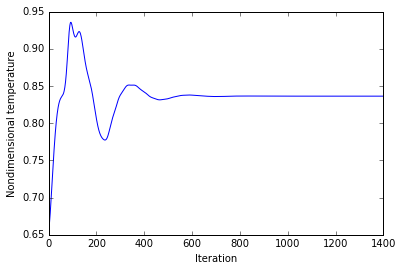

In [114]:
# Temp vs iteration at throat of nozzle
pyplot.plot(tempResults[int(len(rhoResidualResults)/2),:])
pyplot.xlabel('Iteration')
pyplot.ylabel('Nondimensional temperature')

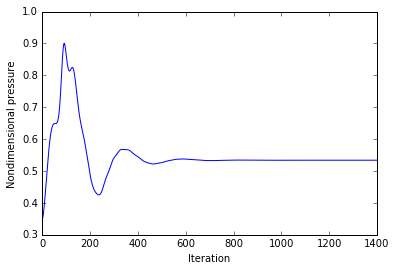

In [115]:
# Pressure vs iteration at throat of nozzle
pyplot.plot(rhoResults[int(len(rhoResidualResults)/2)]*tempResults[int(len(rhoResidualResults)/2),:])
pyplot.xlabel('Iteration')
pyplot.ylabel('Nondimensional pressure')

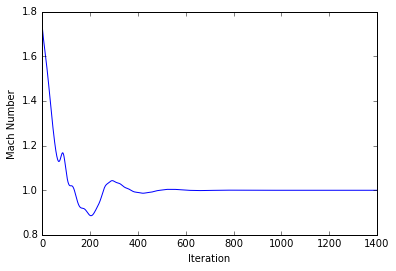

In [116]:
# Mach vs iteration at throat of nozzle
pyplot.plot(velResults[int(len(rhoResidualResults)/2),:]/tempResults[int(len(rhoResidualResults)/2),:]**0.5)
pyplot.xlabel('Iteration')
pyplot.ylabel('Mach Number')

As we can see above, the values begin to converge around 500 iterations. By looking at the mach number plot, we can see that the selected location is $A^*$ because the mach number converges at $M=1$. We can also look at the residuals for our simulation as a function of iterations.

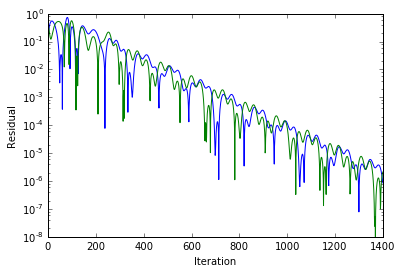

In [117]:
pyplot.plot(abs(rhoResidualResults[int(len(rhoResidualResults)/2),:]))
pyplot.plot(abs(velResidualResults[int(len(rhoResidualResults)/2),:]))
pyplot.yscale('log')
pyplot.ylim([10**-8,1])
pyplot.xlabel('Iteration')
pyplot.ylabel('Residual')